# StarCraft II - Testing agents

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from RelationalModule import CoordActorCritic, OheActorCritic
from Utils import train, plot, utils
from importlib import reload

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
reload(CoordActorCritic)
reload(train)
reload(plot)
reload(utils)

<module 'Utils.utils' from '/home/nicola/Nicola_unipd/MasterThesis/SC2-RL/Utils/utils.py'>

# Agent 1

In [3]:
HPs = dict(action_space=3, observation_space=6, lr=0.0005, gamma=0.9, TD=True, 
                 twin=True, tau=0.1, n_steps=40, H=1e-3, hiddens=[64,32,16])
    
agent = CoordActorCritic.MoveToBeaconA2C(**HPs)

In [4]:
replay_dict = dict(save_replay_episodes=1000,
                   replay_dir='Replays/',
                   replay_prefix='Agent1')

game_params = dict(feature_screen=16, # screen resolution in pixel
                      feature_minimap=16, # minimap resolution in pixel (smaller or equal to screen)
                      action_space="FEATURES") # either FEATURES or RGB - suggested: FEATURES

MAX_STEPS = 256
N_EPISODES = 3000

In [5]:
# Init environment + play one episode + update agent

env = train.init_game(game_params, max_steps=MAX_STEPS, **replay_dict)

results = train.play_episode(agent, env, MAX_STEPS)
rewards, log_probs, distributions, states, done, bootstrap = results

losses = agent.update(rewards, log_probs, distributions, states, done, bootstrap)
critic_loss, agent_loss, negative_entropy_term = losses

print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)

rewards:  (240,)
log_probs:  240
distributions:  240
states:  (241, 6)
done:  (240,)
bootstrap:  (240,)


## Training cycle

In [6]:
%%time
results = train.train_SC2_agent(agent, game_params, N_EPISODES, MAX_STEPS, return_agent=True,  **replay_dict)

Episode 10 - reward: 18.80 
	Time playing the episode: 2.52 s
	Time updating the agent: 0.14 s
Episode 20 - reward: 18.80 
	Time playing the episode: 2.53 s
	Time updating the agent: 0.15 s
Episode 30 - reward: 20.90 
	Time playing the episode: 2.48 s
	Time updating the agent: 0.13 s
Episode 40 - reward: 22.40 
	Time playing the episode: 2.55 s
	Time updating the agent: 0.14 s
Episode 50 - reward: 21.40 
	Time playing the episode: 2.72 s
	Time updating the agent: 0.13 s
Episode 60 - reward: 21.30 
	Time playing the episode: 2.53 s
	Time updating the agent: 0.14 s
Episode 70 - reward: 22.30 
	Time playing the episode: 2.48 s
	Time updating the agent: 0.14 s
Episode 80 - reward: 22.70 
	Time playing the episode: 2.55 s
	Time updating the agent: 0.14 s
Episode 90 - reward: 23.70 
	Time playing the episode: 2.55 s
	Time updating the agent: 0.13 s
Episode 100 - reward: 24.40 
	Time playing the episode: 2.52 s
	Time updating the agent: 0.13 s
Episode 110 - reward: 23.60 
	Time playing the ep

Episode 870 - reward: 25.30 
	Time playing the episode: 2.77 s
	Time updating the agent: 0.13 s
Episode 880 - reward: 25.40 
	Time playing the episode: 2.69 s
	Time updating the agent: 0.13 s
Episode 890 - reward: 26.20 
	Time playing the episode: 2.79 s
	Time updating the agent: 0.13 s
Episode 900 - reward: 25.60 
	Time playing the episode: 2.77 s
	Time updating the agent: 0.15 s
Episode 910 - reward: 26.00 
	Time playing the episode: 2.67 s
	Time updating the agent: 0.13 s
Episode 920 - reward: 26.90 
	Time playing the episode: 2.68 s
	Time updating the agent: 0.14 s
Episode 930 - reward: 25.60 
	Time playing the episode: 2.67 s
	Time updating the agent: 0.13 s
Episode 940 - reward: 25.50 
	Time playing the episode: 2.80 s
	Time updating the agent: 0.18 s
Episode 950 - reward: 25.90 
	Time playing the episode: 2.81 s
	Time updating the agent: 0.13 s
Episode 960 - reward: 25.90 
	Time playing the episode: 6.00 s
	Time updating the agent: 0.15 s
Episode 970 - reward: 26.40 
	Time playi

Episode 1720 - reward: 25.40 
	Time playing the episode: 2.73 s
	Time updating the agent: 0.13 s
Episode 1730 - reward: 25.10 
	Time playing the episode: 2.56 s
	Time updating the agent: 0.14 s
Episode 1740 - reward: 25.50 
	Time playing the episode: 2.59 s
	Time updating the agent: 0.13 s
Episode 1750 - reward: 26.90 
	Time playing the episode: 2.58 s
	Time updating the agent: 0.13 s
Episode 1760 - reward: 25.40 
	Time playing the episode: 2.49 s
	Time updating the agent: 0.12 s
Episode 1770 - reward: 26.00 
	Time playing the episode: 2.59 s
	Time updating the agent: 0.26 s
Episode 1780 - reward: 26.10 
	Time playing the episode: 2.51 s
	Time updating the agent: 0.12 s
Episode 1790 - reward: 24.90 
	Time playing the episode: 2.52 s
	Time updating the agent: 0.13 s
Episode 1800 - reward: 25.90 
	Time playing the episode: 2.56 s
	Time updating the agent: 0.13 s
Episode 1810 - reward: 25.40 
	Time playing the episode: 2.49 s
	Time updating the agent: 0.14 s
Episode 1820 - reward: 25.40 


Episode 2570 - reward: 25.20 
	Time playing the episode: 2.70 s
	Time updating the agent: 0.13 s
Episode 2580 - reward: 25.20 
	Time playing the episode: 2.62 s
	Time updating the agent: 0.13 s
Episode 2590 - reward: 25.70 
	Time playing the episode: 2.58 s
	Time updating the agent: 0.13 s
Episode 2600 - reward: 25.70 
	Time playing the episode: 2.60 s
	Time updating the agent: 0.13 s
Episode 2610 - reward: 26.90 
	Time playing the episode: 2.61 s
	Time updating the agent: 0.13 s
Episode 2620 - reward: 25.90 
	Time playing the episode: 2.65 s
	Time updating the agent: 0.13 s
Episode 2630 - reward: 25.50 
	Time playing the episode: 2.99 s
	Time updating the agent: 0.14 s
Episode 2640 - reward: 27.50 
	Time playing the episode: 2.89 s
	Time updating the agent: 0.18 s
Episode 2650 - reward: 25.60 
	Time playing the episode: 2.66 s
	Time updating the agent: 0.15 s
Episode 2660 - reward: 26.70 
	Time playing the episode: 2.77 s
	Time updating the agent: 0.19 s
Episode 2670 - reward: 25.50 


In [7]:
score, asymptotic_score, asymptotic_err, trained_agent, time_profile, losses = results

Average time for playing one episode: 2.71 s
Average time for updating the agent: 0.14 s
Asymptotic score: 25.828 +/- 1.850


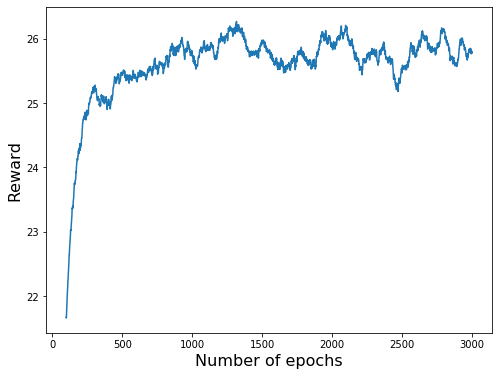

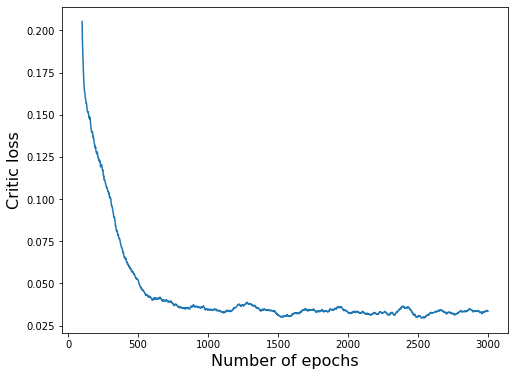

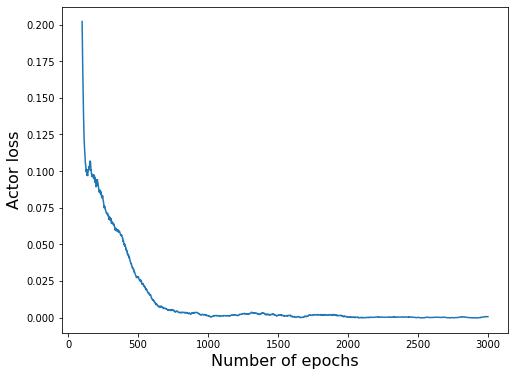

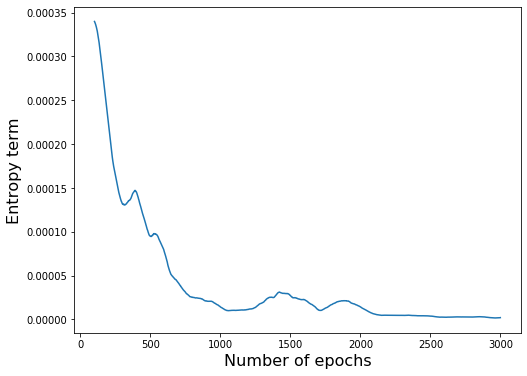

In [8]:
plot.plot_results(results, moving_average=100)

In [1]:
save = False
keywords = ['agent1', str(len(score))+"-episodes","240-steps"] 

if save:
    save_dir = 'Results/MoveToBeacon/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

NameError: name 'score' is not defined

# Agent 2

In [3]:
reload(train)
reload(OheActorCritic)

<module 'RelationalModule.OheActorCritic' from '/home/nicola/Nicola_unipd/MasterThesis/SC2-RL/RelationalModule/OheActorCritic.py'>

In [7]:
SCREEN_RESOLUTION=16

replay_dict = dict(save_replay_episodes=1000,
                   replay_dir='Replays/',
                   replay_prefix='Agent1')

game_params = dict(feature_screen=SCREEN_RESOLUTION, # screen resolution in pixel
                      feature_minimap=SCREEN_RESOLUTION, # minimap resolution in pixel (smaller or equal to screen)
                      action_space="FEATURES") # either FEATURES or RGB - suggested: FEATURES

MAX_STEPS = 256
N_EPISODES = 3000

In [8]:
HPs = dict(action_space=3, map_size=SCREEN_RESOLUTION-2, lr=5e-4, 
           gamma=0.9, TD=True, twin=True, tau=0.3, n_steps=5, H=1e-3)
    
agent = OheActorCritic.MoveToBeaconOheA2C(**HPs)

In [9]:
# Init environment + play one episode + update agent

env = train.init_game(game_params, max_steps=MAX_STEPS, **replay_dict)

results = train.play_episode(agent, env, MAX_STEPS, coord_state=False)
rewards, log_probs, distributions, states, done, bootstrap = results

losses = agent.update(rewards, log_probs, distributions, states, done, bootstrap)
critic_loss, agent_loss, negative_entropy_term = losses

print("rewards: ", rewards.shape)
print("log_probs: ", len(log_probs))
print("distributions: ", len(distributions))
print("states: ", states.shape)
print("done: ", done.shape)
print("bootstrap: ", bootstrap.shape)

rewards:  (240,)
log_probs:  240
distributions:  240
states:  (241, 3, 16, 16)
done:  (240,)
bootstrap:  (240,)


## Training cycle

In [10]:
%%time
results = train.train_SC2_agent(agent, game_params, N_EPISODES, MAX_STEPS, 
                                return_agent=True, coord_state=False, **replay_dict)

Episode 10 - reward: 5.50 
	Time playing the episode: 3.64 s
	Time updating the agent: 4.53 s
Episode 20 - reward: 4.70 
	Time playing the episode: 3.51 s
	Time updating the agent: 3.58 s
Episode 30 - reward: 9.20 
	Time playing the episode: 3.71 s
	Time updating the agent: 3.52 s
Episode 40 - reward: 23.30 
	Time playing the episode: 3.84 s
	Time updating the agent: 3.91 s
Episode 50 - reward: 24.40 
	Time playing the episode: 3.84 s
	Time updating the agent: 3.70 s
Episode 60 - reward: 23.00 
	Time playing the episode: 3.78 s
	Time updating the agent: 3.62 s
Episode 70 - reward: 18.40 
	Time playing the episode: 3.59 s
	Time updating the agent: 3.75 s
Episode 80 - reward: 21.80 
	Time playing the episode: 3.81 s
	Time updating the agent: 4.05 s
Episode 90 - reward: 25.90 
	Time playing the episode: 3.88 s
	Time updating the agent: 4.16 s
Episode 100 - reward: 25.90 
	Time playing the episode: 3.77 s
	Time updating the agent: 3.66 s
CPU times: user 18min 58s, sys: 17.1 s, total: 19min

In [11]:
score, asymptotic_score, asymptotic_err, trained_agent, time_profile, losses = results

Average time for playing one episode: 3.71 s
Average time for updating the agent: 3.79 s
Asymptotic score: 26.188 +/- 2.128


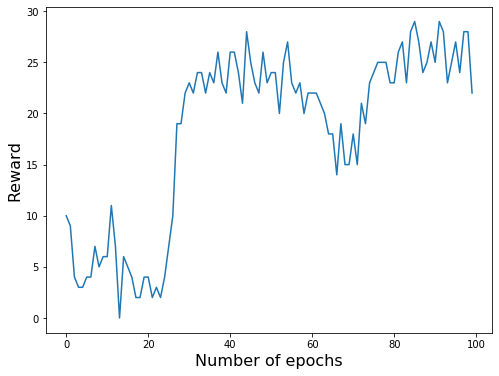

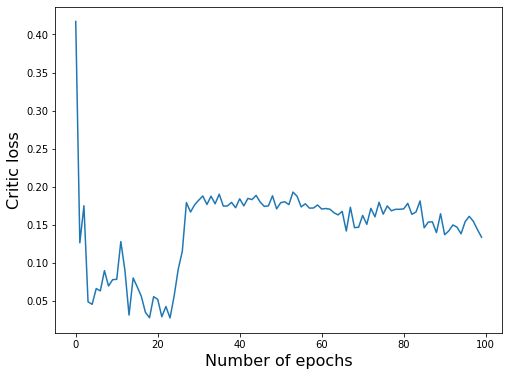

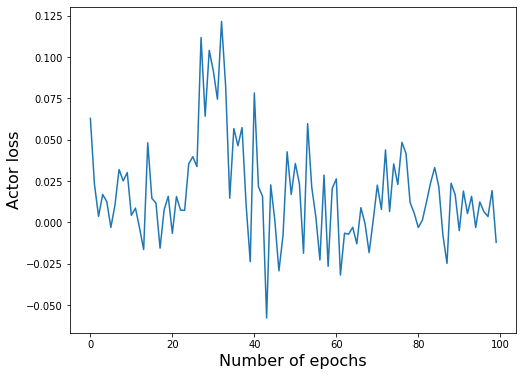

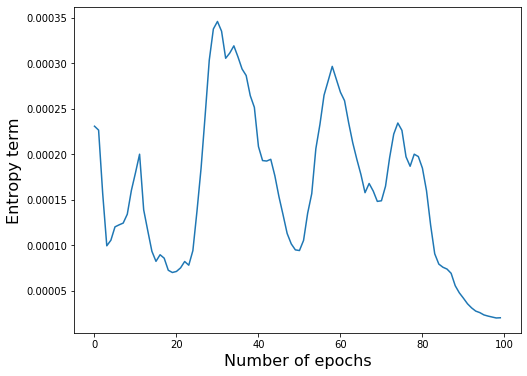

In [14]:
plot.plot_results(results, moving_average=False)

In [13]:
save = False
keywords = ['agent2', str(len(score))+"-episodes","240-steps"] 

if save:
    save_dir = 'Results/MoveToBeacon/'
    ID = utils.save_session(save_dir, keywords, game_params, HPs, score, losses)
    torch.save(trained_agent, save_dir+"agent_"+ID)
else:
    print("Nothing saved")
    pass

Nothing saved


## Scripted agent

In [17]:
from Utils import play_scripted_agent as scripted

In [31]:
reload(scripted)

<module 'Utils.play_scripted_agent' from '/home/nicola/Nicola_unipd/MasterThesis/SC2-RL/Utils/play_scripted_agent.py'>

In [32]:
MAX_STEPS = 256
N_EPISODES = 1000

In [33]:
scripted_results = scripted.evaluate_scripted_agent(N_EPISODES, MAX_STEPS)

Episode 10 / 1000
Episode 20 / 1000
Episode 30 / 1000
Episode 40 / 1000
Episode 50 / 1000
Episode 60 / 1000
Episode 70 / 1000
Episode 80 / 1000
Episode 90 / 1000
Episode 100 / 1000
Episode 110 / 1000
Episode 120 / 1000
Episode 130 / 1000
Episode 140 / 1000
Episode 150 / 1000
Episode 160 / 1000
Episode 170 / 1000
Episode 180 / 1000
Episode 190 / 1000
Episode 200 / 1000
Episode 210 / 1000
Episode 220 / 1000
Episode 230 / 1000
Episode 240 / 1000
Episode 250 / 1000
Episode 260 / 1000
Episode 270 / 1000
Episode 280 / 1000
Episode 290 / 1000
Episode 300 / 1000
Episode 310 / 1000
Episode 320 / 1000
Episode 330 / 1000
Episode 340 / 1000
Episode 350 / 1000
Episode 360 / 1000
Episode 370 / 1000
Episode 380 / 1000
Episode 390 / 1000
Episode 400 / 1000
Episode 410 / 1000
Episode 420 / 1000
Episode 430 / 1000
Episode 440 / 1000
Episode 450 / 1000
Episode 460 / 1000
Episode 470 / 1000
Episode 480 / 1000
Episode 490 / 1000
Episode 500 / 1000
Episode 510 / 1000
Episode 520 / 1000
Episode 530 / 1000
Ep

In [38]:
mean_score, std_score, score = scripted_results
scripted_dict = dict(mean_score=mean_score,
                     std_score=std_score,
                     score=score,
                     MAX_STEPS=MAX_STEPS,
                     N_EPISODES=N_EPISODES)
save_dir = 'Results/MoveToBeacon/'
np.save(save_dir+'scripted_agent_evaluation', scripted_dict)

In [39]:
print("Scripted agent score: %.2f +/- %.2f"%(mean_score, std_score))

Scripted agent score: 25.87 +/- 1.91
